In [1]:
# Importieren der benötigten Bibliotheken

# Datenmanipulation
import pandas as pd
import pickle
import glob

# Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Model Interpretation


**Feature Importance**


In [2]:
# Laden der trainierten Modelle
model_comp = pickle.load(open(glob.glob(str("../data/models/*_compressor_best_model.pkl"))[0], "rb"))
model_turb = pickle.load(open(glob.glob(str("../data/models/*_turbine_best_model.pkl"))[0], "rb"))

feature_names = pd.read_csv("../data/processed/features_train.csv").columns

In [3]:
# Funktion zur Extraktion der Feature-Wichtigkeit (robust für verschiedene Modelltypen)
def get_feature_importance(model, columns):
    # Zugriff auf den eigentlichen Schätzer innerhalb der Pipeline
    estimator = model.named_steps['model']
    
    if hasattr(estimator, 'feature_importances_'):
        # Für Baum-basierte Modelle wie RandomForest
        importances = estimator.feature_importances_
    elif hasattr(estimator, 'coef_'):
        # Für lineare Modelle
        importances = abs(estimator.coef_)
    else:
        return pd.DataFrame({'Feature': columns, 'Importance': [0]*len(columns)}) # Kein Koeffizient/Importance
        
    return pd.DataFrame({'Feature': columns, 'Importance': importances}).sort_values(by="Importance", ascending=False)

# Erstellen von DataFrames für die Feature-Wichtigkeiten
feature_importance_comp = get_feature_importance(model_comp, feature_names)
feature_importance_turb = get_feature_importance(model_turb, feature_names)

print("--- Top 5 Features Kompressor ---")
print(feature_importance_comp.head())
print("\n--- Top 5 Features Turbine ---")
print(feature_importance_turb.head())

--- Top 5 Features Kompressor ---
                                      Feature  Importance
8   gt_compressor_outlet_air_temperature_t2_c    0.240197
2        gas_turbine_gt_shaft_torque_gtt_kn_m    0.219692
9            hp_turbine_exit_pressure_p48_bar    0.194572
4   gas_generator_rate_of_revolutions_ggn_rpm    0.160223
11           gt_exhaust_gas_pressure_pexh_bar    0.091765

--- Top 5 Features Turbine ---
                                      Feature  Importance
10   gt_compressor_outlet_air_pressure_p2_bar    0.439126
4   gas_generator_rate_of_revolutions_ggn_rpm    0.156923
2        gas_turbine_gt_shaft_torque_gtt_kn_m    0.102791
11           gt_exhaust_gas_pressure_pexh_bar    0.080018
3              gt_rate_of_revolutions_gtn_rpm    0.068506


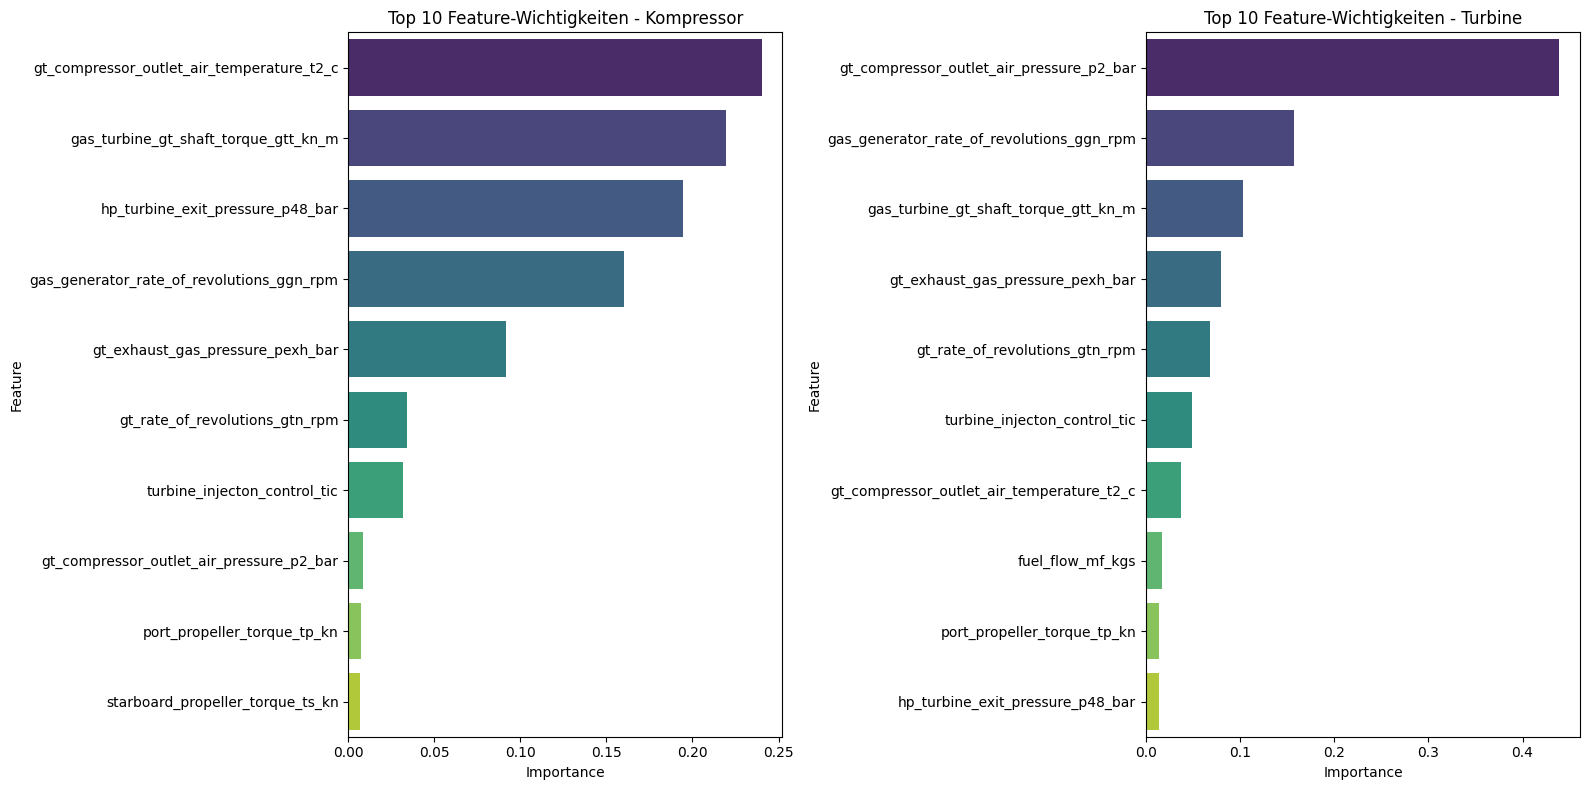

In [4]:
# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(x="Importance", y="Feature", data=feature_importance_comp.head(10), hue="Feature", ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Feature-Wichtigkeiten - Kompressor")

sns.barplot(x="Importance", y="Feature", data=feature_importance_turb.head(10), hue="Feature", ax=axes[1], palette="viridis")
axes[1].set_title("Top 10 Feature-Wichtigkeiten - Turbine")

plt.tight_layout()